In [1]:
import numpy as np
import pandas as pd
import itertools
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler    
from sklearn.tree import DecisionTreeClassifier  
from sklearn.tree import DecisionTreeRegressor
from sklearn import decomposition
from sklearn.ensemble import RandomForestClassifier  
from sklearn.ensemble import RandomForestRegressor  
from sklearn.svm import SVC
from sklearn.svm import SVR

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.naive_bayes import GaussianNB  
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import accuracy_score

from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.pyplot import hist
import statistics
from cycler import cycler

In [2]:
df1 = pd.read_stata('raw data/wave1_wave2only_Final.dta')
df2 = pd.read_stata('raw data/turnout_data_toappend_4ritesh.dta')

In [3]:
df1

,StartDate,EndDate,Status,IPAddress,Progress,Duration__in_seconds_,Finished,RecordedDate,ResponseId,RecipientLastName,...,votes_abortionw2S,votes_abortion_inw2S,votes_deficitw2S,votes_deficit_inw2S,votes_envirow2S,comp_bev_w1,comp_exp_w1,comp_bev_w2,don_C_gun_bin,don_C_wall_in_bin
0,2018-10-03 06:36:57,2018-10-03 06:39:35,IP Address,24.62.90.223,100.0,157.0,True,2018-10-03 06:39:36,R_1MSQ8oyPgL3i1jr,,...,-0.502940,0.502940,0.534734,-0.534734,0.696711,1.0,1.0,1.0,1.0,0.0
1,NaT,NaT,NaN,,NaN,NaN,NaN,NaT,,,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2,2018-10-03 05:26:52,2018-10-03 05:31:17,IP Address,72.160.200.104,100.0,265.0,True,2018-10-03 05:31:18,R_aWfOMCXcnFdqZZ7,,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0
3,2018-10-04 04:38:28,2018-10-04 04:42:33,IP Address,76.109.185.97,100.0,245.0,True,2018-10-04 04:42:34,R_8eNT7FDmoSPChod,,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0
4,2018-10-02 19:10:16,2018-10-02 19:14:42,IP Address,69.248.203.38,100.0,265.0,True,2018-10-02 19:14:43,R_1DMvrrvUeRJvhsc,,...,-0.818321,0.818321,-0.016851,0.016851,0.274410,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7874,NaT,NaT,NaN,,NaN,NaN,NaN,NaT,,,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
7875,2018-10-05 13:47:22,2018-10-05 13:49:31,IP Address,72.193.130.3,100.0,128.0,True,2018-10-05 13:49:31,R_3I3RFlgGWNiMBAV,,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,1.0,0.0
7876,2018-10-06 13:25:07,2018-10-06 13:39:46,IP Address,24.136.28.60,100.0,879.0,True,2018-10-06 13:39:47,R_2wbN189MOTfgjMu,,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0
7877,2018-09-21 13:11:30,2018-09-21 13:16:42,IP Address,108.70.164.231,100.0,311.0,True,2018-09-21 13:16:43,R_2fHaIygCM1jW9b8,,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


In [4]:
df2

,id_w1,voted_obj,voted_yes,voter_registered
0,15385,voted,1.0,1.0
1,21105,did not vote though registered,0.0,1.0
2,21275,voted,1.0,1.0
3,21988,voted,1.0,1.0
4,33907,not in the voter file (not registered),0.0,0.0
...,...,...,...,...
4244,1560344,not in the voter file (not registered),0.0,0.0
4245,1560412,voted,1.0,1.0
4246,1560465,voted,1.0,1.0
4247,1560598,voted,1.0,1.0


In [11]:
df2.groupby('voted_yes').size()

voted_yes
0.0    1411
1.0    2838
dtype: int64

In [9]:
df2['voted_yes'].mean()

0.6679218411445618

In [10]:
df2['voted_yes'].std()

0.47101789712905884

In [5]:
df = pd.merge(df1, df2, how="right", on="id_w1")
df

,StartDate,EndDate,Status,IPAddress,Progress,Duration__in_seconds_,Finished,RecordedDate,ResponseId,RecipientLastName,...,votes_deficit_inw2S,votes_envirow2S,comp_bev_w1,comp_exp_w1,comp_bev_w2,don_C_gun_bin,don_C_wall_in_bin,voted_obj,voted_yes,voter_registered
0,2018-10-03 06:36:57,2018-10-03 06:39:35,IP Address,24.62.90.223,100.0,157.0,True,2018-10-03 06:39:36,R_1MSQ8oyPgL3i1jr,,...,-0.534734,0.696711,1.0,1.0,1.0,1.0,0.0,voted,1.0,1.0
1,2018-10-03 05:26:52,2018-10-03 05:31:17,IP Address,72.160.200.104,100.0,265.0,True,2018-10-03 05:31:18,R_aWfOMCXcnFdqZZ7,,...,NaN,NaN,1.0,1.0,0.0,0.0,0.0,did not vote though registered,0.0,1.0
2,2018-10-04 04:38:28,2018-10-04 04:42:33,IP Address,76.109.185.97,100.0,245.0,True,2018-10-04 04:42:34,R_8eNT7FDmoSPChod,,...,NaN,NaN,1.0,1.0,0.0,0.0,0.0,voted,1.0,1.0
3,2018-10-02 19:10:16,2018-10-02 19:14:42,IP Address,69.248.203.38,100.0,265.0,True,2018-10-02 19:14:43,R_1DMvrrvUeRJvhsc,,...,0.016851,0.274410,1.0,1.0,1.0,0.0,1.0,voted,1.0,1.0
4,2018-10-05 18:25:01,2018-10-05 18:32:04,IP Address,50.40.198.49,100.0,423.0,True,2018-10-05 18:32:05,R_yvwJWx2mTjS4GgV,,...,NaN,NaN,1.0,1.0,0.0,1.0,0.0,not in the voter file (not registered),0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4244,2018-10-03 21:20:55,2018-10-03 21:38:10,IP Address,68.194.138.179,100.0,1034.0,True,2018-10-03 21:38:11,R_3nDuSWPsG2Xu1il,,...,NaN,NaN,1.0,1.0,0.0,0.0,0.0,not in the voter file (not registered),0.0,0.0
4245,2018-10-05 17:12:51,2018-10-05 17:38:22,IP Address,92.43.230.107,100.0,1530.0,True,2018-10-05 17:38:23,R_214yn498Yvzw4BT,,...,NaN,NaN,1.0,1.0,0.0,1.0,0.0,voted,1.0,1.0
4246,2018-10-03 18:25:43,2018-10-03 18:30:51,IP Address,208.118.194.117,100.0,308.0,True,2018-10-03 18:30:52,R_yrK3IFrB0J6Brod,,...,NaN,NaN,1.0,1.0,1.0,1.0,0.0,voted,1.0,1.0
4247,2018-10-02 18:47:15,2018-10-02 18:56:45,IP Address,108.224.52.223,100.0,570.0,True,2018-10-02 18:56:46,R_pxWxAlZYD0uAu1H,,...,1.564713,1.034478,1.0,1.0,1.0,0.0,0.0,voted,1.0,1.0


In [6]:
len(pd.unique(df['id_w1']))

4249

In [7]:
# df_sub is the subset with qvsr, likert and likert+ responses
# df_qvsrn is the subset with qvsrn responses
# we need to append the qvsrn responses (after normalizing) to df_sub
df_sub = df[["id_w1", "votes_AAw1N", "votes_gunw1N", "votes_wall_inw1N", "votes_paidLw1N", "votes_genderw1N",
             "votes_gayw1N", "votes_minWw1N", "votes_abortion_inw1N", "votes_deficit_inw1N", "votes_envirow1N", "voted_obj", 
             "don_C_gun_bin", "don_C_gun", "don_C_wall_in_bin", "don_C_wall_in", "ppeducat", "sex", "ppincimp", "ppwork", 
             "xparty7", "ppethm", "ppage", "method", "treat", "voted_yes"]]
df_qvsrn = df[["id_w1", "QVgay", "QVgun", "QVwall", "QVpaidL", "QVAA", "QVgender", "QVminW", "QVabortion", "QVdeficit", 
               "QVenviro", "voted_obj", "don_C_gun_bin", "don_C_gun", "don_C_wall_in_bin", "don_C_wall_in", "ppeducat", 
               "sex", "ppincimp", "ppwork", "xparty7", "ppethm", "ppage", "method", "treat", "voted_yes"]]

In [8]:
df_sub.groupby('treat').size()

treat
1.0    854
2.0    866
3.0    843
4.0    421
5.0    414
6.0    402
7.0    428
dtype: int64

In [9]:
df_qvsrn.groupby('treat').size()

treat
1.0    854
2.0    866
3.0    843
4.0    421
5.0    414
6.0    402
7.0    428
dtype: int64

In [10]:
# extract only the qvsrn responses (treat=7)
df_qvsrn = df_qvsrn[df_qvsrn['treat']==7]
df_qvsrn['method'] = 4
df_qvsrn.groupby('method').size()

method
4    428
dtype: int64

In [11]:
# Normalize the qvsrn responses
df_qvsrn['QVgay']=(df_qvsrn['QVgay']-df_qvsrn['QVgay'].min())/(df_qvsrn['QVgay'].max()-df_qvsrn['QVgay'].min())
df_qvsrn['QVgun']=(df_qvsrn['QVgun']-df_qvsrn['QVgun'].min())/(df_qvsrn['QVgun'].max()-df_qvsrn['QVgun'].min())
df_qvsrn['QVwall']=(df_qvsrn['QVwall']-df_qvsrn['QVwall'].min())/(df_qvsrn['QVwall'].max()-df_qvsrn['QVwall'].min())
df_qvsrn['QVpaidL']=(df_qvsrn['QVpaidL']-df_qvsrn['QVpaidL'].min())/(df_qvsrn['QVpaidL'].max()-df_qvsrn['QVpaidL'].min())
df_qvsrn['QVAA']=(df_qvsrn['QVAA']-df_qvsrn['QVAA'].min())/(df_qvsrn['QVAA'].max()-df_qvsrn['QVAA'].min())
df_qvsrn['QVgender']=(df_qvsrn['QVgender']-df_qvsrn['QVgender'].min())/(df_qvsrn['QVgender'].max()-df_qvsrn['QVgender'].min())
df_qvsrn['QVminW']=(df_qvsrn['QVminW']-df_qvsrn['QVminW'].min())/(df_qvsrn['QVminW'].max()-df_qvsrn['QVminW'].min())
df_qvsrn['QVabortion']=(df_qvsrn['QVabortion']-df_qvsrn['QVabortion'].min())/(df_qvsrn['QVabortion'].max()-df_qvsrn['QVabortion'].min())
df_qvsrn['QVdeficit']=(df_qvsrn['QVdeficit']-df_qvsrn['QVdeficit'].min())/(df_qvsrn['QVdeficit'].max()-df_qvsrn['QVdeficit'].min())
df_qvsrn['QVenviro']=(df_qvsrn['QVenviro']-df_qvsrn['QVenviro'].min())/(df_qvsrn['QVenviro'].max()-df_qvsrn['QVenviro'].min())


In [12]:
# rename the columns in order to append them in the dataframe with QVSR, Likert and Likert+
df_qvsrn.rename(columns={"QVgay": "votes_gayw1N", "QVgun": "votes_gunw1N", "QVwall": "votes_wall_inw1N", "QVpaidL": "votes_paidLw1N", 
                           "QVAA": "votes_AAw1N", "QVgender": "votes_genderw1N", "QVminW": "votes_minWw1N", "QVabortion": "votes_abortion_inw1N", 
                           "QVdeficit": "votes_deficit_inw1N", "QVenviro": "votes_envirow1N"}, inplace=True)
df_qvsrn


,id_w1,votes_gayw1N,votes_gunw1N,votes_wall_inw1N,votes_paidLw1N,votes_AAw1N,votes_genderw1N,votes_minWw1N,votes_abortion_inw1N,votes_deficit_inw1N,...,ppeducat,sex,ppincimp,ppwork,xparty7,ppethm,ppage,method,treat,voted_yes
14,94454,0.692308,0.6875,0.142857,0.636364,0.6250,0.416667,0.769231,0.277778,0.642857,...,Some college,Female,"$125,000 to $149,999",Not working - retired,Strong Democrat,"Other, Non-Hispanic",77.0,4,7.0,1.0
18,102295,0.538462,0.8750,0.785714,0.545455,0.3750,0.416667,0.692308,0.388889,0.642857,...,Bachelor's degree or higher,Female,"$40,000 to $49,999",Working - as a paid employee,Strong Democrat,Hispanic,42.0,4,7.0,1.0
31,134608,0.615385,0.7500,0.071429,0.545455,0.3750,0.416667,0.615385,0.333333,0.571429,...,Bachelor's degree or higher,Female,"$25,000 to $29,999",Not working - retired,Strong Democrat,"White, Non-Hispanic",73.0,4,7.0,0.0
42,179613,0.692308,0.6875,0.214286,0.727273,0.6250,0.500000,0.846154,0.666667,0.642857,...,Some college,Female,"$30,000 to $34,999",Working - as a paid employee,Strong Democrat,"Other, Non-Hispanic",58.0,4,7.0,0.0
43,188624,0.538462,0.5000,0.357143,0.545455,0.5000,0.583333,0.538462,0.388889,0.500000,...,High school,Female,"$40,000 to $49,999",Working - as a paid employee,Strong Democrat,"White, Non-Hispanic",62.0,4,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4214,1555856,0.384615,0.5625,0.214286,0.727273,0.2500,0.500000,0.615385,0.388889,0.714286,...,Some college,Female,"$40,000 to $49,999",Not working - retired,Not Strong Democrat,"Black, Non-Hispanic",71.0,4,7.0,1.0
4237,1560086,0.076923,0.1875,0.714286,0.181818,0.3125,0.250000,0.230769,0.666667,0.571429,...,Bachelor's degree or higher,Male,"$125,000 to $149,999",Working - as a paid employee,Strong Republican,Hispanic,59.0,4,7.0,0.0
4238,1560153,0.615385,0.7500,0.071429,0.727273,0.5000,0.416667,0.692308,0.277778,0.357143,...,Bachelor's degree or higher,Male,"$150,000 to $174,999",Not working - retired,Leans Republican,"Black, Non-Hispanic",82.0,4,7.0,1.0
4241,1560465,0.384615,0.3750,0.571429,0.545455,0.5000,0.416667,0.769231,0.611111,0.500000,...,Some college,Female,"$40,000 to $49,999",Working - as a paid employee,Not Strong Republican,"White, Non-Hispanic",52.0,4,7.0,1.0


In [13]:
df_sub.groupby('treat').size()

treat
1.0    854
2.0    866
3.0    843
4.0    421
5.0    414
6.0    402
7.0    428
dtype: int64

In [14]:
#append qvsrn responses
df_full = df_sub[(df_sub.method == 1) | (df_sub.method == 2) |(df_sub.method == 3)].append(df_qvsrn)
df_full

,id_w1,votes_AAw1N,votes_gunw1N,votes_wall_inw1N,votes_paidLw1N,votes_genderw1N,votes_gayw1N,votes_minWw1N,votes_abortion_inw1N,votes_deficit_inw1N,...,ppeducat,sex,ppincimp,ppwork,xparty7,ppethm,ppage,method,treat,voted_yes
0,15385,0.571429,0.785714,0.785714,0.500000,0.769231,0.642857,0.571429,0.785714,0.333333,...,Some college,Female,"$35,000 to $39,999",Working - self-employed,Strong Democrat,"White, Non-Hispanic",75.0,3.0,3.0,1.0
1,21105,0.300000,0.700000,0.600000,0.800000,0.800000,0.700000,0.800000,1.000000,0.000000,...,High school,Male,"$25,000 to $29,999",Working - self-employed,Undecided/Independent/Other,"White, Non-Hispanic",56.0,2.0,5.0,0.0
2,21275,0.000000,0.000000,0.000000,0.500000,0.500000,0.166667,0.000000,0.500000,0.500000,...,High school,Male,"$40,000 to $49,999",Not working - retired,Strong Republican,"White, Non-Hispanic",63.0,1.0,4.0,1.0
3,21988,0.500000,0.428571,0.785714,0.750000,0.615385,0.785714,0.714286,0.857143,0.416667,...,Bachelor's degree or higher,Male,"$150,000 to $174,999",Working - as a paid employee,Not Strong Democrat,"White, Non-Hispanic",51.0,3.0,3.0,1.0
4,33907,0.100000,0.000000,0.200000,0.700000,1.000000,0.500000,0.100000,0.200000,0.500000,...,High school,Female,"$60,000 to $74,999",Working - as a paid employee,Not Strong Democrat,"2+ Races, Non-Hispanic",49.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4214,1555856,0.250000,0.562500,0.214286,0.727273,0.500000,0.384615,0.615385,0.388889,0.714286,...,Some college,Female,"$40,000 to $49,999",Not working - retired,Not Strong Democrat,"Black, Non-Hispanic",71.0,4.0,7.0,1.0
4237,1560086,0.312500,0.187500,0.714286,0.181818,0.250000,0.076923,0.230769,0.666667,0.571429,...,Bachelor's degree or higher,Male,"$125,000 to $149,999",Working - as a paid employee,Strong Republican,Hispanic,59.0,4.0,7.0,0.0
4238,1560153,0.500000,0.750000,0.071429,0.727273,0.416667,0.615385,0.692308,0.277778,0.357143,...,Bachelor's degree or higher,Male,"$150,000 to $174,999",Not working - retired,Leans Republican,"Black, Non-Hispanic",82.0,4.0,7.0,1.0
4241,1560465,0.500000,0.375000,0.571429,0.545455,0.416667,0.384615,0.769231,0.611111,0.500000,...,Some college,Female,"$40,000 to $49,999",Working - as a paid employee,Not Strong Republican,"White, Non-Hispanic",52.0,4.0,7.0,1.0


In [15]:
df_full.groupby('treat').size()

treat
1.0    854
2.0    866
3.0    843
4.0    421
5.0    414
6.0    402
7.0    428
dtype: int64

In [16]:
df_full[['ppethm', 'ppeducat', 'sex', 'ppincimp', 'ppwork', 'xparty7']]

,ppethm,ppeducat,sex,ppincimp,ppwork,xparty7
0,"White, Non-Hispanic",Some college,Female,"$35,000 to $39,999",Working - self-employed,Strong Democrat
1,"White, Non-Hispanic",High school,Male,"$25,000 to $29,999",Working - self-employed,Undecided/Independent/Other
2,"White, Non-Hispanic",High school,Male,"$40,000 to $49,999",Not working - retired,Strong Republican
3,"White, Non-Hispanic",Bachelor's degree or higher,Male,"$150,000 to $174,999",Working - as a paid employee,Not Strong Democrat
4,"2+ Races, Non-Hispanic",High school,Female,"$60,000 to $74,999",Working - as a paid employee,Not Strong Democrat
...,...,...,...,...,...,...
4214,"Black, Non-Hispanic",Some college,Female,"$40,000 to $49,999",Not working - retired,Not Strong Democrat
4237,Hispanic,Bachelor's degree or higher,Male,"$125,000 to $149,999",Working - as a paid employee,Strong Republican
4238,"Black, Non-Hispanic",Bachelor's degree or higher,Male,"$150,000 to $174,999",Not working - retired,Leans Republican
4241,"White, Non-Hispanic",Some college,Female,"$40,000 to $49,999",Working - as a paid employee,Not Strong Republican


In [17]:
# convert to categorical variables
df_full['ppeducat'] = df_full['ppeducat'].cat.codes
df_full['sex'] = df_full['sex'].cat.codes
df_full['ppincimp'] = df_full['ppincimp'].cat.codes
df_full['ppwork'] = df_full['ppwork'].cat.codes
df_full['xparty7'] = df_full['xparty7'].cat.codes
df_full['ppethm'] = df_full['ppethm'].cat.codes
df_full[['ppethm', 'ppeducat', 'sex', 'ppincimp', 'ppwork', 'xparty7']]

,ppethm,ppeducat,sex,ppincimp,ppwork,xparty7
0,0,2,1,9,1,6
1,0,1,0,7,1,3
2,0,1,0,10,4,0
3,0,3,0,17,0,5
4,4,1,1,12,0,5
...,...,...,...,...,...,...
4214,1,2,1,10,4,5
4237,3,3,0,16,0,0
4238,1,3,0,17,4,2
4241,0,2,1,10,0,1


In [18]:
df_educat = df_full.groupby(['method'])['ppeducat'].mean().reset_index(name='mean_education')
df_educat

,method,mean_education
0,1.0,2.032941
1,2.0,2.067969
2,3.0,2.075502
3,4.0,2.098131


In [19]:
# Get one hot encoding of columns B
covars = ['ppethm', 'ppeducat', 'ppincimp', 'ppwork', 'xparty7']
cols_covars = ['sex']
for i in covars:
    one_hot = pd.get_dummies(df_full[i], prefix=i, prefix_sep='').max(level=0, axis=1)
    one_hot = one_hot.drop(f'{i}0',axis = 1)
    cols_covars = cols_covars + list(one_hot.columns.values)
    df_full = df_full.join(one_hot)
df_full

,id_w1,votes_AAw1N,votes_gunw1N,votes_wall_inw1N,votes_paidLw1N,votes_genderw1N,votes_gayw1N,votes_minWw1N,votes_abortion_inw1N,votes_deficit_inw1N,...,ppwork3,ppwork4,ppwork5,ppwork6,xparty71,xparty72,xparty73,xparty74,xparty75,xparty76
0,15385,0.571429,0.785714,0.785714,0.500000,0.769231,0.642857,0.571429,0.785714,0.333333,...,0,0,0,0,0,0,0,0,0,1
1,21105,0.300000,0.700000,0.600000,0.800000,0.800000,0.700000,0.800000,1.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
2,21275,0.000000,0.000000,0.000000,0.500000,0.500000,0.166667,0.000000,0.500000,0.500000,...,0,1,0,0,0,0,0,0,0,0
3,21988,0.500000,0.428571,0.785714,0.750000,0.615385,0.785714,0.714286,0.857143,0.416667,...,0,0,0,0,0,0,0,0,1,0
4,33907,0.100000,0.000000,0.200000,0.700000,1.000000,0.500000,0.100000,0.200000,0.500000,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4214,1555856,0.250000,0.562500,0.214286,0.727273,0.500000,0.384615,0.615385,0.388889,0.714286,...,0,1,0,0,0,0,0,0,1,0
4237,1560086,0.312500,0.187500,0.714286,0.181818,0.250000,0.076923,0.230769,0.666667,0.571429,...,0,0,0,0,0,0,0,0,0,0
4238,1560153,0.500000,0.750000,0.071429,0.727273,0.416667,0.615385,0.692308,0.277778,0.357143,...,0,1,0,0,0,1,0,0,0,0
4241,1560465,0.500000,0.375000,0.571429,0.545455,0.416667,0.384615,0.769231,0.611111,0.500000,...,0,0,0,0,1,0,0,0,0,0


In [20]:
# replace the missing values in don_gun and don_wall with 0
df_full['don_C_wall_in'] = df_full['don_C_wall_in'].replace(np.nan, 0)
df_full['don_C_gun'] = df_full['don_C_gun'].replace(np.nan, 0)

In [21]:
# find the missing values in the covariates
df_full.isnull().sum()

id_w1                 0
votes_AAw1N         135
votes_gunw1N        139
votes_wall_inw1N    137
votes_paidLw1N      135
                   ... 
xparty72              0
xparty73              0
xparty74              0
xparty75              0
xparty76              0
Length: 65, dtype: int64

In [22]:
df_full

,id_w1,votes_AAw1N,votes_gunw1N,votes_wall_inw1N,votes_paidLw1N,votes_genderw1N,votes_gayw1N,votes_minWw1N,votes_abortion_inw1N,votes_deficit_inw1N,...,ppwork3,ppwork4,ppwork5,ppwork6,xparty71,xparty72,xparty73,xparty74,xparty75,xparty76
0,15385,0.571429,0.785714,0.785714,0.500000,0.769231,0.642857,0.571429,0.785714,0.333333,...,0,0,0,0,0,0,0,0,0,1
1,21105,0.300000,0.700000,0.600000,0.800000,0.800000,0.700000,0.800000,1.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
2,21275,0.000000,0.000000,0.000000,0.500000,0.500000,0.166667,0.000000,0.500000,0.500000,...,0,1,0,0,0,0,0,0,0,0
3,21988,0.500000,0.428571,0.785714,0.750000,0.615385,0.785714,0.714286,0.857143,0.416667,...,0,0,0,0,0,0,0,0,1,0
4,33907,0.100000,0.000000,0.200000,0.700000,1.000000,0.500000,0.100000,0.200000,0.500000,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4214,1555856,0.250000,0.562500,0.214286,0.727273,0.500000,0.384615,0.615385,0.388889,0.714286,...,0,1,0,0,0,0,0,0,1,0
4237,1560086,0.312500,0.187500,0.714286,0.181818,0.250000,0.076923,0.230769,0.666667,0.571429,...,0,0,0,0,0,0,0,0,0,0
4238,1560153,0.500000,0.750000,0.071429,0.727273,0.416667,0.615385,0.692308,0.277778,0.357143,...,0,1,0,0,0,1,0,0,0,0
4241,1560465,0.500000,0.375000,0.571429,0.545455,0.416667,0.384615,0.769231,0.611111,0.500000,...,0,0,0,0,1,0,0,0,0,0


In [23]:
df_full[df_full.isnull().any(axis=1)]

,id_w1,votes_AAw1N,votes_gunw1N,votes_wall_inw1N,votes_paidLw1N,votes_genderw1N,votes_gayw1N,votes_minWw1N,votes_abortion_inw1N,votes_deficit_inw1N,...,ppwork3,ppwork4,ppwork5,ppwork6,xparty71,xparty72,xparty73,xparty74,xparty75,xparty76
75,314584,0.5,0.5,0.857143,0.416667,0.461538,0.642857,0.5,0.642857,0.583333,...,0,0,0,0,0,0,0,0,0,1
120,336229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
130,338886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,1,0
183,372066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
195,373835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3881,1481004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,1,0
3903,1485239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4004,1500825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
4030,1503066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0


In [24]:
# drop rows with missing values for all votes and replace 0 for the remaining
col_votes = ["votes_AAw1N", "votes_gunw1N", "votes_wall_inw1N", "votes_paidLw1N", "votes_genderw1N", 
         "votes_gayw1N", "votes_minWw1N", "votes_abortion_inw1N", "votes_deficit_inw1N", "votes_envirow1N"]
df_new = df_full.dropna(subset=col_votes, how='all')
df_new[col_votes] = df_full[col_votes].replace(np.nan, 0)
df_new

C:\WBG\anaconda\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,id_w1,votes_AAw1N,votes_gunw1N,votes_wall_inw1N,votes_paidLw1N,votes_genderw1N,votes_gayw1N,votes_minWw1N,votes_abortion_inw1N,votes_deficit_inw1N,...,ppwork3,ppwork4,ppwork5,ppwork6,xparty71,xparty72,xparty73,xparty74,xparty75,xparty76
0,15385,0.571429,0.785714,0.785714,0.500000,0.769231,0.642857,0.571429,0.785714,0.333333,...,0,0,0,0,0,0,0,0,0,1
1,21105,0.300000,0.700000,0.600000,0.800000,0.800000,0.700000,0.800000,1.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
2,21275,0.000000,0.000000,0.000000,0.500000,0.500000,0.166667,0.000000,0.500000,0.500000,...,0,1,0,0,0,0,0,0,0,0
3,21988,0.500000,0.428571,0.785714,0.750000,0.615385,0.785714,0.714286,0.857143,0.416667,...,0,0,0,0,0,0,0,0,1,0
4,33907,0.100000,0.000000,0.200000,0.700000,1.000000,0.500000,0.100000,0.200000,0.500000,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4203,1553246,0.437500,1.000000,0.714286,0.545455,0.250000,0.461538,0.615385,0.500000,0.428571,...,0,0,0,1,0,0,0,0,1,0
4214,1555856,0.250000,0.562500,0.214286,0.727273,0.500000,0.384615,0.615385,0.388889,0.714286,...,0,1,0,0,0,0,0,0,1,0
4237,1560086,0.312500,0.187500,0.714286,0.181818,0.250000,0.076923,0.230769,0.666667,0.571429,...,0,0,0,0,0,0,0,0,0,0
4238,1560153,0.500000,0.750000,0.071429,0.727273,0.416667,0.615385,0.692308,0.277778,0.357143,...,0,1,0,0,0,1,0,0,0,0


In [25]:
# check for missing values
df_new[df_new.isnull().any(axis=1)]

,id_w1,votes_AAw1N,votes_gunw1N,votes_wall_inw1N,votes_paidLw1N,votes_genderw1N,votes_gayw1N,votes_minWw1N,votes_abortion_inw1N,votes_deficit_inw1N,...,ppwork3,ppwork4,ppwork5,ppwork6,xparty71,xparty72,xparty73,xparty74,xparty75,xparty76


In [26]:
len(pd.unique(df_new['id_w1']))

4096

In [27]:
# "donate_bin" -> dummy variable to indicate donation to any of the charities
# "donate" -> continuous variable to indicate donation to any of the charities
df_new['donate_wall_bin'] = (df_new.don_C_wall_in != 0).astype('int')
df_new['donate_wall_abs'] = df_new['don_C_wall_in'].abs()

df_new['donate_gun_bin'] = (df_new.don_C_gun != 0).astype('int')
df_new['donate_gun_abs'] = df_new['don_C_gun'].abs()

df_new['donate_bin'] = df_new['don_C_gun_bin'] + df_new['don_C_wall_in_bin']
df_new['donate'] = df_new['don_C_gun'] + df_new['don_C_wall_in']
df_new['donate_abs'] = df_new['donate'].abs()

# Rename the columns
df_new.rename(columns={"don_C_wall_in": "donate_wall", "don_C_gun": "donate_gun"}, inplace=True)
df_new

<ipython-input-27-d5eeb410c978>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['donate_wall_bin'] = (df_new.don_C_wall_in != 0).astype('int')
<ipython-input-27-d5eeb410c978>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['donate_wall_abs'] = df_new['don_C_wall_in'].abs()
<ipython-input-27-d5eeb410c978>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,id_w1,votes_AAw1N,votes_gunw1N,votes_wall_inw1N,votes_paidLw1N,votes_genderw1N,votes_gayw1N,votes_minWw1N,votes_abortion_inw1N,votes_deficit_inw1N,...,xparty74,xparty75,xparty76,donate_wall_bin,donate_wall_abs,donate_gun_bin,donate_gun_abs,donate_bin,donate,donate_abs
0,15385,0.571429,0.785714,0.785714,0.500000,0.769231,0.642857,0.571429,0.785714,0.333333,...,0,0,1,0,0.0,1,25.0,1.0,25.0,25.0
1,21105,0.300000,0.700000,0.600000,0.800000,0.800000,0.700000,0.800000,1.000000,0.000000,...,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0
2,21275,0.000000,0.000000,0.000000,0.500000,0.500000,0.166667,0.000000,0.500000,0.500000,...,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0
3,21988,0.500000,0.428571,0.785714,0.750000,0.615385,0.785714,0.714286,0.857143,0.416667,...,0,1,0,1,20.0,0,0.0,1.0,20.0,20.0
4,33907,0.100000,0.000000,0.200000,0.700000,1.000000,0.500000,0.100000,0.200000,0.500000,...,0,1,0,0,0.0,1,10.0,1.0,-10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4203,1553246,0.437500,1.000000,0.714286,0.545455,0.250000,0.461538,0.615385,0.500000,0.428571,...,0,1,0,0,0.0,1,50.0,1.0,50.0,50.0
4214,1555856,0.250000,0.562500,0.214286,0.727273,0.500000,0.384615,0.615385,0.388889,0.714286,...,0,1,0,0,0.0,1,50.0,1.0,50.0,50.0
4237,1560086,0.312500,0.187500,0.714286,0.181818,0.250000,0.076923,0.230769,0.666667,0.571429,...,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0
4238,1560153,0.500000,0.750000,0.071429,0.727273,0.416667,0.615385,0.692308,0.277778,0.357143,...,0,0,0,0,0.0,1,80.0,1.0,80.0,80.0


In [28]:
# Separate models for each survey methodology to predict turnout and calculate Brier Scores - Model 1 binary outcome variable
df_likert = df_new[df_new['method']==1]
df_qvsr = df_new[df_new['method']==3]
df_likertp = df_new[df_new['method']==2]
df_qvsrn = df_new[df_new['method']==4]

var = ["votes_AAw1N", "votes_gunw1N", "votes_wall_inw1N", "votes_paidLw1N", "votes_genderw1N", "votes_gayw1N", "votes_minWw1N", 
       "votes_abortion_inw1N", "votes_deficit_inw1N", "votes_envirow1N"] + cols_covars
outcome_var = ["voted_yes", "donate_gun_bin", "donate_wall_bin", "donate_bin"]

df_pred_full = pd.DataFrame()

for df in [df_likert, df_qvsr, df_likertp, df_qvsrn]:
    df_pred = pd.DataFrame()
    X = df[var]
    for outcome in outcome_var:
        y = df[outcome]
    
        # Splitting the dataset into training and test set.  
        x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)  
        df_pred[f'{outcome}_test'] = y_test
        
        #LOGISTIC REGRESSION
        model = LogisticRegression(random_state = 0)
        space = {'solver' : ['newton-cg', 'lbfgs', 'liblinear'], 'penalty' : ['none', 'l1', 'l2'],
                'C' : [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
                }
        grid_lr = GridSearchCV(model, space, scoring='roc_auc', n_jobs=-1, cv=5)
        logreg = grid_lr.fit(x_train, y_train)
        df_pred[f'{outcome}_logreg'] = logreg.predict(x_test)
        df[f'{outcome}_logreg']= logreg.predict_proba(X)[:,1]
        df[f'mse_{outcome}_logreg'] = (df[outcome] - df[f'{outcome}_logreg'])**2
    
        #LASSO
        #model = Lasso(random_state = 0)
        #grid = dict()
        #grid['alpha'] = np.arange(0, 1, 0.01)
        #search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
        #lasso= search.fit(x_train, y_train)
        #df_pred[f'{outcome}_lasso']= lasso.predict(x_test)
        #df[f'{outcome}_lasso']= lasso.predict(X)
        #df[f'mse_{outcome}_lasso'] = (df[outcome] - df[f'{outcome}_lasso'])**2

        #DECISION TREE
        model = DecisionTreeClassifier(random_state = 0)
        param_grid = {'max_features': ['auto', 'sqrt']}
        grid_dt = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc' )
        dtree = grid_dt.fit(x_train, y_train)
        df_pred[f'{outcome}_dtree']= dtree.predict(x_test)
        df[f'{outcome}_dtree']= dtree.predict_proba(X)[:,1]
        df[f'mse_{outcome}_dtree'] = (df[outcome] - df[f'{outcome}_dtree'])**2
  
        #RANDOM FOREST
        param_grid = {'max_features': ['auto', 'sqrt'], 'n_estimators': [1000, 1500]}
        model = RandomForestClassifier(random_state = 0)
        grid_rf = GridSearchCV(model, param_grid = param_grid, cv = 5, scoring='roc_auc', n_jobs = -1)
        rf = grid_rf.fit(x_train, y_train)
        df_pred[f'{outcome}_rf']= rf.predict(x_test)
        df[f'{outcome}_rf']= rf.predict_proba(X)[:,1]
        df[f'mse_{outcome}_rf'] = (df[outcome] - df[f'{outcome}_rf'])**2
  
        #XGBOOST
        params = {'n_estimators': [1000, 1500], 'max_features': ['auto', 'sqrt']}
        model = XGBClassifier(random_state = 0)
        grid_xgb = GridSearchCV(model, param_grid=params, scoring='roc_auc', n_jobs=-1, cv=5)
        xgb = grid_xgb.fit(x_train, y_train)
        df_pred[f'{outcome}_xgb']= xgb.predict(x_test)
        df[f'{outcome}_xgb']= xgb.predict_proba(X)[:,1]
        df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2

        #KNN
        model = KNeighborsClassifier()
        k_range = list(range(1, 10))
        param_grid = dict(n_neighbors=k_range)
        grid_knn = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
        knn = grid_knn.fit(x_train, y_train)
        df_pred[f'{outcome}_knn']= knn.predict(x_test)
        df[f'{outcome}_knn']= knn.predict_proba(X)[:,1]
        df[f'mse_{outcome}_knn'] = (df[outcome] - df[f'{outcome}_knn'])**2
  
        #AdaBoost
        param_grid = {"n_estimators": [1000]}
        DTC = DecisionTreeClassifier(random_state = 0, max_features = 'auto')
        ABC = AdaBoostClassifier(base_estimator = DTC)
        grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')
        ada = grid_search_ABC.fit(x_train, y_train)
        df_pred[f'{outcome}_ada']= ada.predict(x_test)
        df[f'{outcome}_ada']= ada.predict_proba(X)[:,1]
        df[f'mse_{outcome}_ada'] = (df[outcome] - df[f'{outcome}_ada'])**2
  
        #Elastic Net
        parametersGrid = {"max_iter": [10]}

        eNet = ElasticNet()
        grid = GridSearchCV(eNet, parametersGrid, scoring='roc_auc', cv=5)
        en = grid.fit(x_train, y_train)
        df_pred[f'{outcome}_en']= en.predict(x_test)
        df[f'{outcome}_en']= en.predict(X)
        df[f'mse_{outcome}_en'] = (df[outcome] - df[f'{outcome}_en'])**2
       
    df_pred_full = df_pred_full.append(df_pred)
df_all_vars = pd.concat([df_likert, df_qvsr, df_likertp, df_qvsrn])
df_all_vars.to_csv("turnout-gun-wall_binvars_pred.csv", index=False)
df_pred_full

<ipython-input-28-4e2f890f8775>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_logreg']= logreg.predict_proba(X)[:,1]
<ipython-input-28-4e2f890f8775>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_logreg'] = (df[outcome] - df[f'{outcome}_logreg'])**2
<ipython-input-28-4e2f890f8775>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

[13:59:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:59:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<ipython-input-28-4e2f890f8775>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_xgb']= xgb.predict_proba(X)[:,1]
<ipython-input-28-4e2f890f8775>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2
<ipython-input-28-4e2f890f8775>:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

[13:59:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:59:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<ipython-input-28-4e2f890f8775>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_xgb']= xgb.predict_proba(X)[:,1]
<ipython-input-28-4e2f890f8775>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2
<ipython-input-28-4e2f890f8775>:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

[14:00:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:00:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<ipython-input-28-4e2f890f8775>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_xgb']= xgb.predict_proba(X)[:,1]
<ipython-input-28-4e2f890f8775>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2
<ipython-input-28-4e2f890f8775>:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

[14:00:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:00:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<ipython-input-28-4e2f890f8775>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_xgb']= xgb.predict_proba(X)[:,1]
<ipython-input-28-4e2f890f8775>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2
<ipython-input-28-4e2f890f8775>:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

[14:01:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:01:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<ipython-input-28-4e2f890f8775>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_xgb']= xgb.predict_proba(X)[:,1]
<ipython-input-28-4e2f890f8775>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2
<ipython-input-28-4e2f890f8775>:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

[14:01:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:01:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<ipython-input-28-4e2f890f8775>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_xgb']= xgb.predict_proba(X)[:,1]
<ipython-input-28-4e2f890f8775>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2
<ipython-input-28-4e2f890f8775>:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

[14:02:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:02:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<ipython-input-28-4e2f890f8775>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_xgb']= xgb.predict_proba(X)[:,1]
<ipython-input-28-4e2f890f8775>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2
<ipython-input-28-4e2f890f8775>:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

[14:02:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:02:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<ipython-input-28-4e2f890f8775>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_xgb']= xgb.predict_proba(X)[:,1]
<ipython-input-28-4e2f890f8775>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2
<ipython-input-28-4e2f890f8775>:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

[14:03:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:03:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<ipython-input-28-4e2f890f8775>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_xgb']= xgb.predict_proba(X)[:,1]
<ipython-input-28-4e2f890f8775>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2
<ipython-input-28-4e2f890f8775>:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

[14:03:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:03:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<ipython-input-28-4e2f890f8775>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_xgb']= xgb.predict_proba(X)[:,1]
<ipython-input-28-4e2f890f8775>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2
<ipython-input-28-4e2f890f8775>:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

[14:04:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:04:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<ipython-input-28-4e2f890f8775>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_xgb']= xgb.predict_proba(X)[:,1]
<ipython-input-28-4e2f890f8775>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2
<ipython-input-28-4e2f890f8775>:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

[14:04:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:04:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<ipython-input-28-4e2f890f8775>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_xgb']= xgb.predict_proba(X)[:,1]
<ipython-input-28-4e2f890f8775>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2
<ipython-input-28-4e2f890f8775>:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

[14:04:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:04:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<ipython-input-28-4e2f890f8775>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_xgb']= xgb.predict_proba(X)[:,1]
<ipython-input-28-4e2f890f8775>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2
<ipython-input-28-4e2f890f8775>:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

[14:05:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:05:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<ipython-input-28-4e2f890f8775>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_xgb']= xgb.predict_proba(X)[:,1]
<ipython-input-28-4e2f890f8775>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2
<ipython-input-28-4e2f890f8775>:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

[14:05:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:05:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<ipython-input-28-4e2f890f8775>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_xgb']= xgb.predict_proba(X)[:,1]
<ipython-input-28-4e2f890f8775>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2
<ipython-input-28-4e2f890f8775>:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

[14:05:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:05:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<ipython-input-28-4e2f890f8775>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_xgb']= xgb.predict_proba(X)[:,1]
<ipython-input-28-4e2f890f8775>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2
<ipython-input-28-4e2f890f8775>:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,voted_yes_test,voted_yes_logreg,voted_yes_dtree,voted_yes_rf,voted_yes_xgb,voted_yes_knn,voted_yes_ada,voted_yes_en,donate_gun_bin_test,donate_gun_bin_logreg,...,donate_wall_bin_ada,donate_wall_bin_en,donate_bin_test,donate_bin_logreg,donate_bin_dtree,donate_bin_rf,donate_bin_xgb,donate_bin_knn,donate_bin_ada,donate_bin_en
2630,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.682824,1,0,...,0,0.214963,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.531085
1128,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.682824,0,0,...,0,0.214963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.531085
3296,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.682824,1,0,...,0,0.214963,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.531085
27,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.682824,0,0,...,0,0.214963,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.531085
3982,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.682824,0,0,...,0,0.214963,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.531085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3940,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.630000,1,0,...,0,0.176667,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.520000
619,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.630000,1,0,...,0,0.176667,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.520000
94,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.630000,1,0,...,0,0.176667,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.520000
4214,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.630000,1,0,...,0,0.176667,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.520000


In [29]:
outcome_var = ["voted_yes", "donate_gun_bin", "donate_wall_bin", "donate_bin"]
rows = []
method = ['logreg', 'dtree', 'rf', 'xgb', 'knn', 'ada']
col_names = ['Outcome_Method']
for col in outcome_var:
    col_names.append(f'MSE_{col}')
    col_names.append(f'F1_{col}')
for i in method:
    out_method = [i]
    for j in outcome_var:
        out_method.append(mean_squared_error(df_pred_full[f'{j}_test'], df_pred_full[f'{j}_{i}']))
        out_method.append(f1_score(df_pred_full[f'{j}_test'], df_pred_full[f'{j}_{i}']))
    rows.append(out_method)
df_mse_test = pd.DataFrame(rows, columns=col_names)
df_mse_test

,Outcome_Method,MSE_voted_yes,F1_voted_yes,MSE_donate_gun_bin,F1_donate_gun_bin,MSE_donate_wall_bin,F1_donate_wall_bin,MSE_donate_bin,F1_donate_bin
0,logreg,0.327485,0.793612,0.319688,0.062857,0.227096,0.048980,0.446394,0.678371
1,dtree,0.393762,0.706821,0.411306,0.417127,0.331384,0.244444,0.428850,0.588015
2,rf,0.309942,0.802484,0.296296,0.369295,0.220273,0.025862,0.382066,0.642987
3,xgb,0.379142,0.731168,0.356725,0.417197,0.273879,0.190202,0.417154,0.609489
4,knn,0.393762,0.719444,0.341131,0.316406,0.252437,0.029963,0.430799,0.572534
5,ada,0.420078,0.684249,0.410331,0.383602,0.310916,0.220049,0.432749,0.588889


In [30]:
# Separate models for each survey methodology to predict turnout and calculate Brier Scores - Model 2 continuous outcome variable
df_likert = df_new[df_new['method']==1]
df_qvsr = df_new[df_new['method']==3]
df_likertp = df_new[df_new['method']==2]
df_qvsrn = df_new[df_new['method']==4]

var = ["votes_AAw1N", "votes_gunw1N", "votes_wall_inw1N", "votes_paidLw1N", "votes_genderw1N", "votes_gayw1N", "votes_minWw1N", 
       "votes_abortion_inw1N", "votes_deficit_inw1N", "votes_envirow1N"] + cols_covars
outcome_var = ["donate_gun", "donate_gun_abs", "donate_wall", "donate_wall_abs", "donate", "donate_abs"]

df_pred_full = pd.DataFrame()

for df in [df_likert, df_qvsr, df_likertp, df_qvsrn]:
    df_pred = pd.DataFrame()
    X = df[var]
    for outcome in outcome_var:
        y = df[outcome]
    
        # Splitting the dataset into training and test set.  
        x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)  
        df_pred[f'{outcome}_test'] = y_test
        
        #LASSO
        model = Lasso(random_state = 0)
        grid = dict()
        grid['alpha'] = np.arange(0, 1, 0.01)
        grid_lasso = GridSearchCV(model, grid, scoring='r2', cv=5, n_jobs=-1)
        lasso= grid_lasso.fit(x_train, y_train)
        df_pred[f'{outcome}_lasso']= lasso.predict(x_test)
        df[f'{outcome}_lasso']= lasso.predict(X)
        df[f'mse_{outcome}_lasso'] = (df[outcome] - df[f'{outcome}_lasso'])**2

        #DECISION TREE
        model=DecisionTreeRegressor(random_state = 0)
        parameters={"max_features":["auto","sqrt"]}
        grid_dt=GridSearchCV(model,param_grid=parameters,scoring='r2',cv=5)
        dtree = grid_dt.fit(x_train, y_train)
        df_pred[f'{outcome}_dtree']= dtree.predict(x_test)
        df[f'{outcome}_dtree']= dtree.predict(X)
        df[f'mse_{outcome}_dtree'] = (df[outcome] - df[f'{outcome}_dtree'])**2
  
        #RANDOM FOREST
        param_grid = {'max_features': ['auto', 'sqrt'], 'n_estimators': [1000, 1500]}
        model = RandomForestRegressor(random_state = 0)
        grid_rf = GridSearchCV(model, param_grid = param_grid, cv = 5, n_jobs = -1, scoring='r2')
        rf = grid_rf.fit(x_train, y_train)
        df_pred[f'{outcome}_rf']= rf.predict(x_test)
        df[f'{outcome}_rf']= rf.predict(X)
        df[f'mse_{outcome}_rf'] = (df[outcome] - df[f'{outcome}_rf'])**2
  
        #XGBOOST
        model = XGBRegressor()
        
        parameters = {'n_estimators': [1000, 1500], 'max_features': ['auto', 'sqrt']}
        xgb_grid = GridSearchCV(model, parameters, cv = 5, n_jobs = -1, scoring="r2")
        xgb = xgb_grid.fit(x_train, y_train)
        df_pred[f'{outcome}_xgb']= xgb.predict(x_test)
        df[f'{outcome}_xgb']= xgb.predict(X)
        df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2
  
        #KNN
        model = KNeighborsRegressor()
        k_range = list(range(1, 10))
        param_grid = dict(n_neighbors=k_range)
        grid_knn = GridSearchCV(model, param_grid, cv=5, scoring='r2')
        knn = grid_knn.fit(x_train, y_train)
        df_pred[f'{outcome}_knn']= knn.predict(x_test)
        df[f'{outcome}_knn']= knn.predict(X)
        df[f'mse_{outcome}_knn'] = (df[outcome] - df[f'{outcome}_knn'])**2
  
        #AdaBoost
        param_grid = {"n_estimators": [1000]}
        DTC = DecisionTreeRegressor(random_state = 0, max_features = 'auto')
        ABC = AdaBoostRegressor(base_estimator = DTC)
        grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, cv = 5, n_jobs = -1, scoring = 'r2')
        ada = grid_search_ABC.fit(x_train, y_train)
        df_pred[f'{outcome}_ada']= ada.predict(x_test)
        df[f'{outcome}_ada']= ada.predict(X)
        df[f'mse_{outcome}_ada'] = (df[outcome] - df[f'{outcome}_ada'])**2
  
        #Elastic Net
        parametersGrid = {"max_iter": [10]}

        eNet = ElasticNet()
        grid = GridSearchCV(eNet, parametersGrid, scoring='r2', cv=5)
        en = grid.fit(x_train, y_train)
        df_pred[f'{outcome}_en']= en.predict(x_test)
        df[f'{outcome}_en']= en.predict(X)
        df[f'mse_{outcome}_en'] = (df[outcome] - df[f'{outcome}_en'])**2
  
    df_pred_full = df_pred_full.append(df_pred)
df_all_vars = pd.concat([df_likert, df_qvsr, df_likertp, df_qvsrn])
df_all_vars.to_csv("turnout-gun-wall_contvars_pred.csv", index=False)
df_pred_full

<ipython-input-30-97592d5c641e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_lasso']= lasso.predict(X)
<ipython-input-30-97592d5c641e>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_lasso'] = (df[outcome] - df[f'{outcome}_lasso'])**2
<ipython-input-30-97592d5c641e>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

[14:06:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




<ipython-input-30-97592d5c641e>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_xgb']= xgb.predict(X)
<ipython-input-30-97592d5c641e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2
<ipython-input-30-97592d5c641e>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

[14:06:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




<ipython-input-30-97592d5c641e>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_xgb']= xgb.predict(X)
<ipython-input-30-97592d5c641e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2
<ipython-input-30-97592d5c641e>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

[14:07:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




<ipython-input-30-97592d5c641e>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_xgb']= xgb.predict(X)
<ipython-input-30-97592d5c641e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2
<ipython-input-30-97592d5c641e>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

[14:07:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




<ipython-input-30-97592d5c641e>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_xgb']= xgb.predict(X)
<ipython-input-30-97592d5c641e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2
<ipython-input-30-97592d5c641e>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

[14:08:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




<ipython-input-30-97592d5c641e>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_xgb']= xgb.predict(X)
<ipython-input-30-97592d5c641e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2
<ipython-input-30-97592d5c641e>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

[14:09:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




<ipython-input-30-97592d5c641e>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_xgb']= xgb.predict(X)
<ipython-input-30-97592d5c641e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2
<ipython-input-30-97592d5c641e>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

[14:09:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




<ipython-input-30-97592d5c641e>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_xgb']= xgb.predict(X)
<ipython-input-30-97592d5c641e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2
<ipython-input-30-97592d5c641e>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

[14:10:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




<ipython-input-30-97592d5c641e>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_xgb']= xgb.predict(X)
<ipython-input-30-97592d5c641e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2
<ipython-input-30-97592d5c641e>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

[14:10:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




<ipython-input-30-97592d5c641e>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_xgb']= xgb.predict(X)
<ipython-input-30-97592d5c641e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2
<ipython-input-30-97592d5c641e>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

[14:11:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




<ipython-input-30-97592d5c641e>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_xgb']= xgb.predict(X)
<ipython-input-30-97592d5c641e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2
<ipython-input-30-97592d5c641e>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

[14:12:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




<ipython-input-30-97592d5c641e>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_xgb']= xgb.predict(X)
<ipython-input-30-97592d5c641e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2
<ipython-input-30-97592d5c641e>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

[14:12:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




<ipython-input-30-97592d5c641e>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_xgb']= xgb.predict(X)
<ipython-input-30-97592d5c641e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2
<ipython-input-30-97592d5c641e>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

[14:13:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




<ipython-input-30-97592d5c641e>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_xgb']= xgb.predict(X)
<ipython-input-30-97592d5c641e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2
<ipython-input-30-97592d5c641e>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

[14:13:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




<ipython-input-30-97592d5c641e>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_xgb']= xgb.predict(X)
<ipython-input-30-97592d5c641e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2
<ipython-input-30-97592d5c641e>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

[14:14:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




<ipython-input-30-97592d5c641e>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_xgb']= xgb.predict(X)
<ipython-input-30-97592d5c641e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2
<ipython-input-30-97592d5c641e>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

[14:15:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




<ipython-input-30-97592d5c641e>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_xgb']= xgb.predict(X)
<ipython-input-30-97592d5c641e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2
<ipython-input-30-97592d5c641e>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

[14:15:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




<ipython-input-30-97592d5c641e>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_xgb']= xgb.predict(X)
<ipython-input-30-97592d5c641e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2
<ipython-input-30-97592d5c641e>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

[14:16:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




<ipython-input-30-97592d5c641e>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_xgb']= xgb.predict(X)
<ipython-input-30-97592d5c641e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2
<ipython-input-30-97592d5c641e>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

[14:16:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




<ipython-input-30-97592d5c641e>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_xgb']= xgb.predict(X)
<ipython-input-30-97592d5c641e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2
<ipython-input-30-97592d5c641e>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

[14:17:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




<ipython-input-30-97592d5c641e>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_xgb']= xgb.predict(X)
<ipython-input-30-97592d5c641e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2
<ipython-input-30-97592d5c641e>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

[14:17:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




<ipython-input-30-97592d5c641e>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_xgb']= xgb.predict(X)
<ipython-input-30-97592d5c641e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2
<ipython-input-30-97592d5c641e>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

[14:17:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




<ipython-input-30-97592d5c641e>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_xgb']= xgb.predict(X)
<ipython-input-30-97592d5c641e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2
<ipython-input-30-97592d5c641e>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

[14:18:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




<ipython-input-30-97592d5c641e>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_xgb']= xgb.predict(X)
<ipython-input-30-97592d5c641e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2
<ipython-input-30-97592d5c641e>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

[14:18:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




<ipython-input-30-97592d5c641e>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{outcome}_xgb']= xgb.predict(X)
<ipython-input-30-97592d5c641e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'mse_{outcome}_xgb'] = (df[outcome] - df[f'{outcome}_xgb'])**2
<ipython-input-30-97592d5c641e>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

,donate_gun_test,donate_gun_lasso,donate_gun_dtree,donate_gun_rf,donate_gun_xgb,donate_gun_knn,donate_gun_ada,donate_gun_en,donate_gun_abs_test,donate_gun_abs_lasso,...,donate_ada,donate_en,donate_abs_test,donate_abs_lasso,donate_abs_dtree,donate_abs_rf,donate_abs_xgb,donate_abs_knn,donate_abs_ada,donate_abs_en
2630,25.0,13.205877,0.0,13.613333,4.851198,31.666666,0.0,12.209127,25.0,14.379048,...,0.0,15.216405,25.0,20.917466,0.0,19.801333,15.088987,35.000000,10.0,27.276747
1128,0.0,-2.358598,0.0,-1.300000,6.362640,-15.000000,0.0,-1.836522,0.0,9.408075,...,-10.0,-10.949851,0.0,13.052248,100.0,28.116000,28.365784,36.111111,10.0,21.587730
3296,100.0,20.589914,10.0,17.396667,18.326048,6.666667,10.0,12.831619,100.0,14.019206,...,10.0,19.067365,100.0,25.663607,0.0,27.260000,48.936317,28.888889,20.0,28.397697
27,0.0,-0.249583,0.0,-4.796667,13.866955,5.555555,0.0,2.386188,0.0,13.849408,...,0.0,-0.716309,10.0,26.287703,50.0,22.612222,-1.087523,22.222221,0.0,25.390907
3982,0.0,15.630138,0.0,22.736667,2.074947,13.333333,0.0,7.903580,0.0,19.244637,...,20.0,9.718041,0.0,24.955579,95.0,31.472000,46.903255,30.000000,20.0,27.016602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3940,100.0,1.842546,10.0,0.762667,0.151441,-1.875000,0.0,7.804978,100.0,13.359502,...,0.0,9.370153,100.0,15.488482,0.0,15.203333,11.311272,23.125000,0.0,25.211752
619,-10.0,8.274762,0.0,-0.904667,-1.836730,-1.250000,0.0,8.077366,10.0,17.961230,...,0.0,8.859935,10.0,34.704471,0.0,14.461333,12.036674,45.625000,0.0,27.713003
94,50.0,10.564365,10.0,12.190000,9.954882,-6.250000,0.0,7.016313,50.0,15.274123,...,0.0,7.542317,50.0,27.288894,10.0,23.466667,17.434855,28.750000,10.0,26.362871
4214,50.0,5.558557,0.0,5.066000,1.086062,10.625000,0.0,6.871049,50.0,19.123606,...,0.0,8.930273,50.0,26.012994,0.0,21.604000,12.461730,10.625000,0.0,26.446676


In [31]:
outcome_var = ["donate_gun", "donate_gun_abs", "donate_wall", "donate_wall_abs", "donate", "donate_abs"]
rows = []
method = ['dtree', 'rf', 'lasso', 'xgb', 'knn', 'ada', 'en']
col_names = ['Outcome_Method']
for col in outcome_var:
    col_names.append(f'MSE_{col}')
    col_names.append(f'R2_{col}')
for i in method:
    out_method = [i]
    for j in outcome_var:
        out_method.append(mean_squared_error(df_pred_full[f'{j}_test'], df_pred_full[f'{j}_{i}']))
        out_method.append(r2_score(df_pred_full[f'{j}_test'], df_pred_full[f'{j}_{i}']))
    rows.append(out_method)
df_mse_test = pd.DataFrame(rows, columns=col_names)
df_mse_test

,Outcome_Method,MSE_donate_gun,R2_donate_gun,MSE_donate_gun_abs,R2_donate_gun_abs,MSE_donate_wall,R2_donate_wall,MSE_donate_wall_abs,R2_donate_wall_abs,MSE_donate,R2_donate,MSE_donate_abs,R2_donate_abs
0,dtree,1736.284600,-0.752375,1705.105263,-1.060157,1269.911306,-0.732609,1421.270955,-1.283532,2360.083821,-0.391135,1945.989279,-0.739555
1,rf,791.595186,0.201069,763.706614,0.077268,621.734147,0.151734,601.705940,0.033249,1131.810248,0.332862,989.189648,0.115745
2,lasso,791.229514,0.201438,792.526701,0.042447,629.409809,0.141262,616.973092,0.008720,1175.057885,0.307370,1045.959597,0.064998
3,xgb,1029.328247,-0.038867,1031.160522,-0.245878,791.007690,-0.079215,778.282837,-0.250454,1464.280151,0.136890,1265.776978,-0.131501
4,knn,920.364380,0.071107,835.363037,-0.009310,709.280823,0.032290,659.776489,-0.060052,1336.622314,0.212137,1084.643799,0.030417
5,ada,946.370370,0.044860,908.255361,-0.097380,697.716374,0.048068,692.997410,-0.113427,1275.355750,0.248250,1101.005848,0.015791
6,en,883.867648,0.107942,810.599433,0.020611,684.187157,0.066526,620.097662,0.003700,1377.501551,0.188041,1083.964593,0.031024


In [32]:
import rpy2.robjects as robjects
r=robjects.r
output = r.source("QVSR_Policytree_turnout-donate.R")

In [2]:
df = pd.read_csv('policytree_turnout-gun-wall_binvars-output.csv')

In [4]:
var_dict = dict({"voted_predict_rf" : "Voter Turnout",
                 "gun_bin_predict_xgb" : "Donate-Gun",
                 "wall_bin_predict_ada" : "Donate-Wall",
                 "donate_bin_predict_rf" : "Donation to any charity",
                })

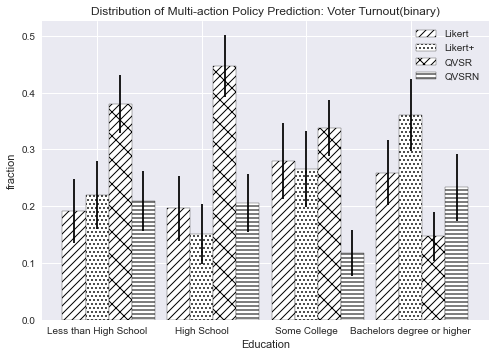

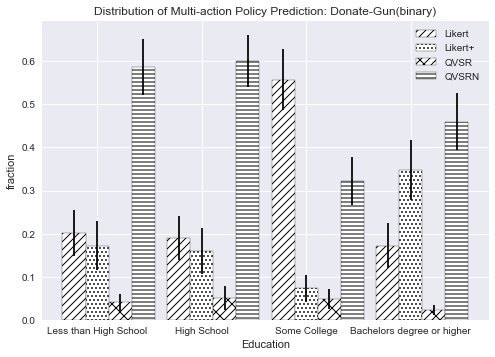

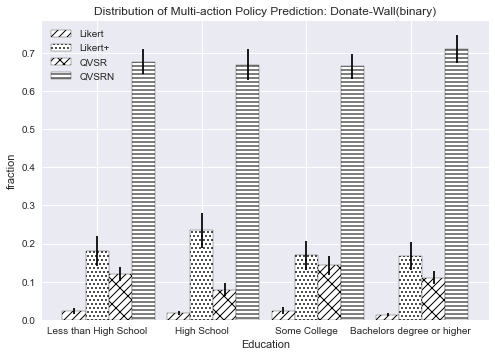

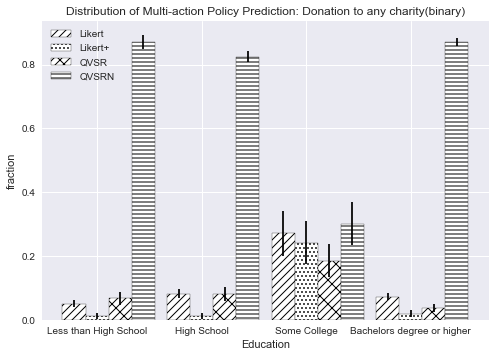

In [35]:
# Distribution of multi-action policy assignment
vars = ["voted_predict_rf", "gun_bin_predict_xgb", "wall_bin_predict_ada", "donate_bin_predict_rf"]
for y in vars:
    qL = []
    qLp = []
    qQ = []
    qQN = []
    ciL = []
    ciLp = []
    ciQ = []
    ciQN = []
    for i in range(0,4):
        l = []
        lp = []
        q = []
        qn = []
        for j in range (1, 101):
            qq = df[df['ppeducat']==i].groupby(f"{y}{j}").size().reset_index(name = 'count')
            p=[]
            for k in range(0,len(qq)):
                p.append(qq[f"{y}{j}"][k])
            for k in [1,2,3,4]:
                if k not in p:
                    qq.at[len(qq)] = [k,0]
            m = qq['count'][qq[qq[f"{y}{j}"]==1].index.values[0]] + qq['count'][qq[qq[f"{y}{j}"]==2].index.values[0]] + qq['count'][qq[qq[f"{y}{j}"]==3].index.values[0]] + qq['count'][qq[qq[f"{y}{j}"]==4].index.values[0]]
            l.append(qq['count'][qq[qq[f"{y}{j}"]==1].index.values[0]]/m)
            lp.append(qq['count'][qq[qq[f"{y}{j}"]==2].index.values[0]]/m)
            q.append(qq['count'][qq[qq[f"{y}{j}"]==3].index.values[0]]/m)
            qn.append(qq['count'][qq[qq[f"{y}{j}"]==4].index.values[0]]/m)

        qL.append(statistics.mean(l))
        qLp.append(statistics.mean(lp))
        qQ.append(statistics.mean(q))
        qQN.append(statistics.mean(qn))
        ciL.append(1.96*statistics.stdev(l)/10)
        ciLp.append(1.96*statistics.stdev(lp)/10)
        ciQ.append(1.96*statistics.stdev(q)/10)
        ciQN.append(1.96*statistics.stdev(qn)/10)


    barWidth = 0.22
    r1 = np.arange(len(qL))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]

    bar_cycle = (cycler('hatch', ['///', '...', '\///', '---', 'xxx', '\\\\']) * cycler('color', 'w')*cycler('zorder', [10]))
    styles = bar_cycle()

    plt.style.use('seaborn')
    plt.bar(r1, qL, width = barWidth, **next(styles), edgecolor = 'black', yerr=ciL, capsize=7, label='Likert')
    plt.bar(r2, qLp, width = barWidth, **next(styles), edgecolor = 'black', yerr=ciLp, capsize=7, label='Likert+')
    plt.bar(r3, qQ, width = barWidth, **next(styles), edgecolor = 'black', yerr=ciQ, capsize=7, label='QVSR')
    plt.bar(r4, qQN, width = barWidth, **next(styles), edgecolor = 'black', yerr=ciQN, capsize=7, label='QVSRN')

    # general layout
    plt.xticks([r + barWidth for r in range(len(qL))], ['Less than High School', 'High School', 'Some College', 'Bachelors degree or higher'])
    plt.ylabel('fraction')
    plt.xlabel('Education')
    plt.title("Distribution of Multi-action Policy Prediction: " + var_dict[y] + "(binary)")
    plt.legend()

    # Show graphic
    plt.show()

In [36]:
df = pd.read_csv('policytree_turnout-gun-wall_contvars-output.csv')

In [37]:
var_dict = dict({"donate_predict_rf" : "Donation to any charity",
                 "donate_abs_predict_rf" : "Absolute amount donated",
                 "donate_wall_predict_rf" : "Donate-Wall",
                 "donate_wall_abs_predict_rf" : "Absolute Donate-Wall",
                 "donate_gun_predict_lasso" : "Donate-Gun",
                 "donate_gun_abs_predict_rf" : "Absolute Donate-Gun"
                })

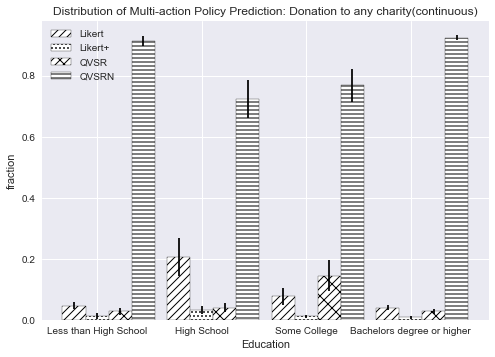

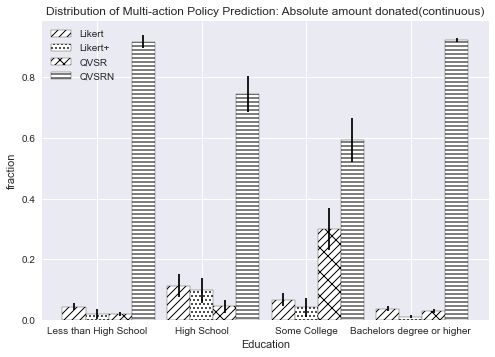

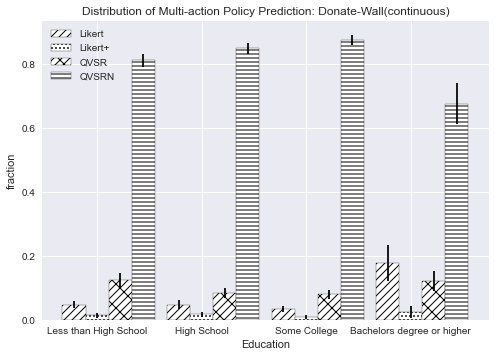

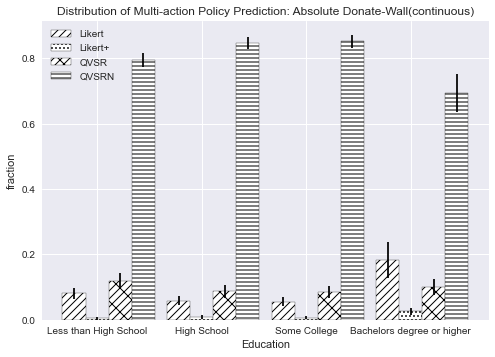

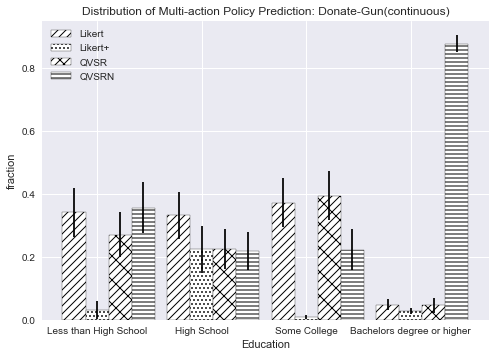

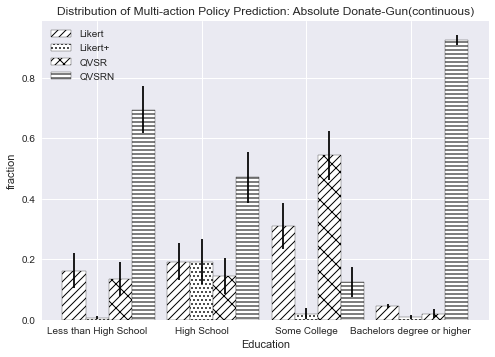

In [39]:
# Distribution of multi-action policy assignment
vars = ["donate_predict_rf", "donate_abs_predict_rf", "donate_wall_predict_rf", "donate_wall_abs_predict_rf", "donate_gun_predict_lasso", "donate_gun_abs_predict_rf"]
for y in vars:
    qL = []
    qLp = []
    qQ = []
    qQN = []
    ciL = []
    ciLp = []
    ciQ = []
    ciQN = []
    for i in range(0,4):
        l = []
        lp = []
        q = []
        qn = []
        for j in range (1, 101):
            qq = df[df['ppeducat']==i].groupby(f"{y}{j}").size().reset_index(name = 'count')
            p=[]
            for k in range(0,len(qq)):
                p.append(qq[f"{y}{j}"][k])
            for k in [1,2,3,4]:
                if k not in p:
                    qq.at[len(qq)] = [k,0]
            m = qq['count'][qq[qq[f"{y}{j}"]==1].index.values[0]] + qq['count'][qq[qq[f"{y}{j}"]==2].index.values[0]] + qq['count'][qq[qq[f"{y}{j}"]==3].index.values[0]] + qq['count'][qq[qq[f"{y}{j}"]==4].index.values[0]]
            l.append(qq['count'][qq[qq[f"{y}{j}"]==1].index.values[0]]/m)
            lp.append(qq['count'][qq[qq[f"{y}{j}"]==2].index.values[0]]/m)
            q.append(qq['count'][qq[qq[f"{y}{j}"]==3].index.values[0]]/m)
            qn.append(qq['count'][qq[qq[f"{y}{j}"]==4].index.values[0]]/m)

        qL.append(statistics.mean(l))
        qLp.append(statistics.mean(lp))
        qQ.append(statistics.mean(q))
        qQN.append(statistics.mean(qn))
        ciL.append(1.96*statistics.stdev(l)/10)
        ciLp.append(1.96*statistics.stdev(lp)/10)
        ciQ.append(1.96*statistics.stdev(q)/10)
        ciQN.append(1.96*statistics.stdev(qn)/10)


    barWidth = 0.22
    r1 = np.arange(len(qL))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]

    bar_cycle = (cycler('hatch', ['///', '...', '\///', '---', 'xxx', '\\\\']) * cycler('color', 'w')*cycler('zorder', [10]))
    styles = bar_cycle()

    plt.style.use('seaborn')
    plt.bar(r1, qL, width = barWidth, **next(styles), edgecolor = 'black', yerr=ciL, capsize=7, label='Likert')
    plt.bar(r2, qLp, width = barWidth, **next(styles), edgecolor = 'black', yerr=ciLp, capsize=7, label='Likert+')
    plt.bar(r3, qQ, width = barWidth, **next(styles), edgecolor = 'black', yerr=ciQ, capsize=7, label='QVSR')
    plt.bar(r4, qQN, width = barWidth, **next(styles), edgecolor = 'black', yerr=ciQN, capsize=7, label='QVSRN')

    # general layout
    plt.xticks([r + barWidth for r in range(len(qL))], ['Less than High School', 'High School', 'Some College', 'Bachelors degree or higher'])
    plt.ylabel('fraction')
    plt.xlabel('Education')
    plt.title("Distribution of Multi-action Policy Prediction: " + var_dict[y] + "(continuous)")
    plt.legend()

    # Show graphic
    plt.show()

One Likert and One QV

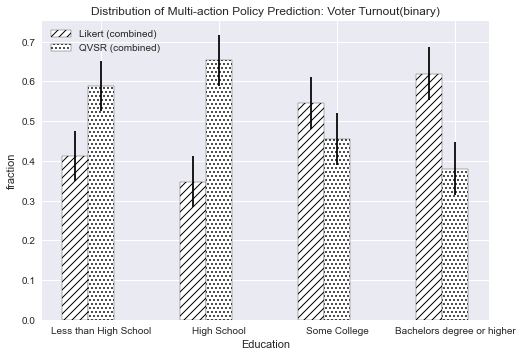

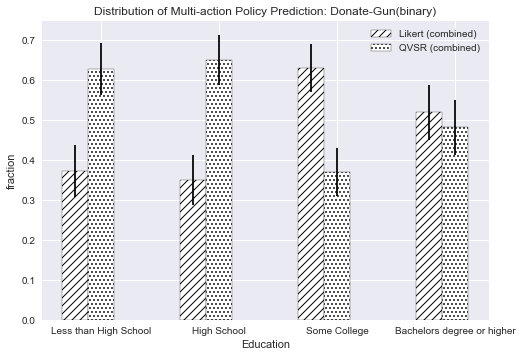

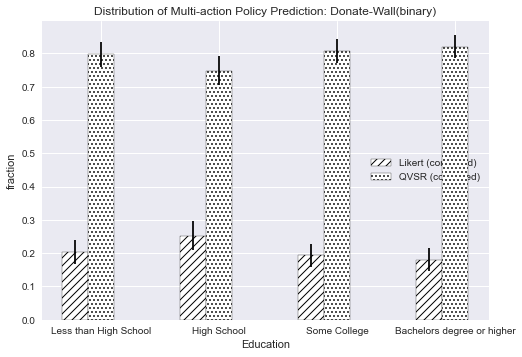

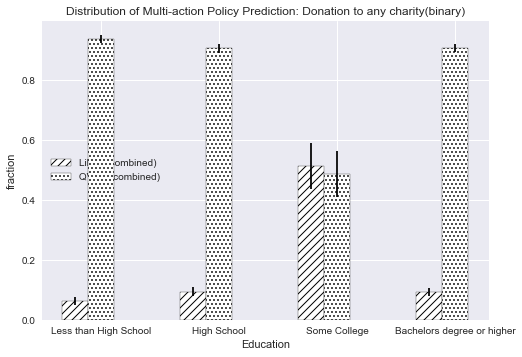

In [6]:
# Distribution of multi-action policy assignment
df = pd.read_csv('policytree_turnout-gun-wall_binvars-output.csv')
vars = ["voted_predict_rf", "gun_bin_predict_xgb", "wall_bin_predict_ada", "donate_bin_predict_rf"]
for y in vars:
    qL = []
    qLp = []
    qQ = []
    qQN = []
    ciL = []
    ciLp = []
    ciQ = []
    ciQN = []
    for i in range(0,4):
        l = []
        lp = []
        q = []
        qn = []
        for j in range (1, 101):
            qq = df[df['ppeducat']==i].groupby(f"{y}{j}").size().reset_index(name = 'count')
            p=[]
            for k in range(0,len(qq)):
                p.append(qq[f"{y}{j}"][k])
            for k in [1,2,3,4]:
                if k not in p:
                    qq.at[len(qq)] = [k,0]
            m = qq['count'][qq[qq[f"{y}{j}"]==1].index.values[0]] + qq['count'][qq[qq[f"{y}{j}"]==2].index.values[0]] + qq['count'][qq[qq[f"{y}{j}"]==3].index.values[0]] + qq['count'][qq[qq[f"{y}{j}"]==4].index.values[0]]
            l.append((qq['count'][qq[qq[f"{y}{j}"]==1].index.values[0]] + qq['count'][qq[qq[f"{y}{j}"]==2].index.values[0]])/m)
#            lp.append(qq['count'][qq[qq[f"{y}{j}"]==2].index.values[0]]/m)
            q.append((qq['count'][qq[qq[f"{y}{j}"]==3].index.values[0]] + qq['count'][qq[qq[f"{y}{j}"]==4].index.values[0]])/m)
#            qn.append(qq['count'][qq[qq[f"{y}{j}"]==4].index.values[0]]/m)

        qL.append(statistics.mean(l))
#        qLp.append(statistics.mean(lp))
        qQ.append(statistics.mean(q))
#        qQN.append(statistics.mean(qn))
        ciL.append(1.96*statistics.stdev(l)/10)
#        ciLp.append(1.96*statistics.stdev(lp)/10)
        ciQ.append(1.96*statistics.stdev(q)/10)
#        ciQN.append(1.96*statistics.stdev(qn)/10)


    barWidth = 0.22
    r1 = np.arange(len(qL))
    r2 = [x + barWidth for x in r1]
#    r3 = [x + barWidth for x in r2]
#    r4 = [x + barWidth for x in r3]

    bar_cycle = (cycler('hatch', ['///', '...', '\///', '---', 'xxx', '\\\\']) * cycler('color', 'w')*cycler('zorder', [10]))
    styles = bar_cycle()

    plt.style.use('seaborn')
    plt.bar(r1, qL, width = barWidth, **next(styles), edgecolor = 'black', yerr=ciL, capsize=7, label='Likert (combined)')
#    plt.bar(r2, qLp, width = barWidth, **next(styles), edgecolor = 'black', yerr=ciLp, capsize=7, label='Likert+')
    plt.bar(r2, qQ, width = barWidth, **next(styles), edgecolor = 'black', yerr=ciQ, capsize=7, label='QVSR (combined)')
#    plt.bar(r4, qQN, width = barWidth, **next(styles), edgecolor = 'black', yerr=ciQN, capsize=7, label='QVSRN')

    # general layout
    plt.xticks([r + barWidth for r in range(len(qL))], ['Less than High School', 'High School', 'Some College', 'Bachelors degree or higher'])
    plt.ylabel('fraction')
    plt.xlabel('Education')
    plt.title("Distribution of Multi-action Policy Prediction: " + var_dict[y] + "(binary)")
    plt.legend()

    # Show graphic
    plt.show()